In [ ]:
# examples graphics and animation examples used to develop the main point charges app

In [1]:
import numpy as np
from numpy import *
import scipy.io
import struct

import csv
import numpy
import ipyvolume as ipv

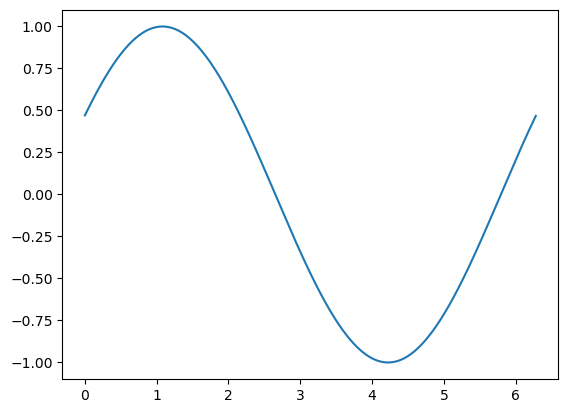

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#from IPython.display import HTML




fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())
#plt.show()

In [3]:
# f(u, v) -> (u, v, u*v**2)
a = np.arange(-5, 5)
U, V = np.meshgrid(a, a)
X = U
Y = V
Z = X*Y**2

ipv.figure()
ipv.plot_surface(X, Z, Y, color="orange")
ipv.plot_wireframe(X, Z, Y, color="red")
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
nrows = 3
ncols = 5
#print(np.shape())
Z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

print(x,y,np.shape(x),np.shape(y),np.shape(Z))

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max())

In [ ]:
#use matplotlib quiver plot
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [ ]:
import numpy as np
import ipyvolume as ipv

# Spatial grid
u = np.linspace(-1, 1, 32)
x, y = np.meshgrid(u, u)
x = x.flatten()
y = y.flatten()

In [ ]:
# Time evolution
timesteps = 20
r = np.sqrt(x**2 + y**2)

ex_sequence = np.array([np.cos(r + t) for t in np.linspace(0, 2*np.pi, timesteps)])
ey_sequence = np.array([np.sin(r + t) for t in np.linspace(0, 2*np.pi, timesteps)])

In [ ]:
def exeyupdate(t, x, y):
    r = np.sqrt(x**2 + y**2)
    ex = np.cos(r + t)
    ey = np.sin(r + t)
    return ex, ey

In [ ]:
timesteps = 20
xgrid, ygrid = np.meshgrid(np.linspace(-1, 1, 32), np.linspace(-1, 1, 32))
x = xgrid.flatten()
y = ygrid.flatten()

ex_sequence = []
ey_sequence = []

for t in np.linspace(0, 2*np.pi, timesteps):
    ex, ey = exeyupdate(t, x, y)
    ex_sequence.append(ex)
    ey_sequence.append(ey)

ex_sequence = np.array(ex_sequence)
ey_sequence = np.array(ey_sequence)

In [ ]:
ipv.figure()
q = ipv.quiver(x, y, np.zeros_like(x),  # positions
               ex_sequence, ey_sequence, np.zeros_like(ex_sequence),  # vectors
               size=5, color='blue')

ipv.animation_control(q, interval=200)
ipv.show()